# **TFG**  

***Use of Machine Learning and SNOMED CT encoded Health Problems to Predict Hospital Discharge Diagnoses***  

Cindy Chen

Universitat de Barcelona

2024-2025


In [ ]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
import gradio as gr
import os
from pycaret.classification import *
from pycaret.classification import plot_model
from pycaret.classification import predict_model, pull, load_model

%matplotlib inline

## **Data Importation**

Import Subset 7 to find the best model, train the model, tune it and evaluate.

In [2]:
# Import data
data = pd.read_csv("C:/Users/Cindy Chen/Desktop/TFG/data/04_data/subset_7.csv")
data

,adm_drug_dose_mean,adm_given,adm_prn,adm_route_ref,age,care_level_duration,clinical_records_result_num_mean,cr_meas_type_ref,death,diag_class_ref_H,...,icd10_capitulo,lab_result_num_mean,no_administration_reason_ref,num_health_issues,ongoing,prescription_drug_dose_mean,prescription_freq_ref,rc_sap_ref_PRESN_SIS,sex_atr,snomed_code
0,1.2,1.0,0.0,150.0,81.0,706.924438,94.131577,1.0,1.0,0.0,...,17,0.000000,3.0,3.0,1.0,100.000000,10.653915,0.0,2.0,240131006.0
1,100.0,0.0,1.0,150.0,47.0,146.750000,68.900002,0.0,0.0,0.0,...,17,97.176926,0.0,3.0,1.0,0.666667,10.653915,0.0,1.0,109989006.0
2,500.0,1.0,0.0,350.0,73.0,1703.783569,110.247528,1.0,0.0,0.0,...,1,1.740909,5.0,5.0,1.0,491.333344,10.653915,1.0,1.0,439740005.0
3,2.0,1.0,0.0,150.0,74.0,433.244171,36.254166,0.0,0.0,0.0,...,9,0.050000,6.0,8.0,1.0,500.000000,10.764504,0.0,2.0,433146000.0
4,1.0,0.0,0.0,100.0,74.0,481.936676,55.170731,0.0,0.0,0.0,...,16,0.966667,0.0,8.0,1.0,4.800000,10.158386,0.0,2.0,307496006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045979,100.0,1.0,0.0,150.0,67.0,2.855278,91.694443,0.0,1.0,0.0,...,14,75.750000,3.0,4.0,1.0,491.166656,10.764504,0.0,2.0,409623005.0
1045980,1.0,0.0,0.0,150.0,77.0,94.935280,67.321426,2.0,0.0,0.0,...,14,1.483333,0.0,2.0,1.0,1.000000,10.844777,0.0,1.0,230690007.0
1045981,1.0,1.0,0.0,100.0,45.0,107.043053,77.400002,0.0,0.0,0.0,...,1,78.501724,5.0,3.0,1.0,1.000000,10.844777,0.0,2.0,307651005.0
1045982,2.0,1.0,0.0,150.0,54.0,1306.877197,96.349998,0.0,0.0,1.0,...,15,100.199997,6.0,1.0,1.0,2.000000,10.653915,0.0,2.0,77493009.0


Setup the pycaret environment and select the target column, in our case is the 'icd10_capitulo' column. This function also splits the data into training (70%) and testing set (30%). 

In [3]:
# setup PyCaret
clf = setup(data=data, target='icd10_capitulo', session_id=123, verbose=True) 

,Description,Value
0,Session id,123
1,Target,icd10_capitulo
2,Target type,Multiclass
3,Original data shape,"(1045984, 30)"
4,Transformed data shape,"(1045984, 30)"
5,Transformed train set shape,"(732188, 30)"
6,Transformed test set shape,"(313796, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [4]:
# Get preprocessing pipeline
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\CINDYC~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['adm_drug_dose_mean', 'adm_given',
                                             'adm_prn', 'adm_route_ref', 'age',
                                             'care_level_duration',
                                             'clinical_records_result_num_mean',
                                             'cr_meas_type_ref', 'death',
                                             'diag_class_ref_H',
                                             'diag_class_ref_P',
                                             'diag_class_r...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent')))],
         verbose=False)

## **Model Comparison**

Using the ```compare_models``` function to compare the selected models: Logistic Regression, Decision Trees, Random Forest, XGBoost, SVM, KNN and MLP.  

This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. 

In [5]:
# Compare models
model_comparison = compare_models(include=["lr", 'dt', 'rf', 'xgboost', 'svm', 'knn', 'mlp'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6644,0.8185,0.6644,0.6648,0.6646,0.6286,0.6286,1.8460
xgboost,Extreme Gradient Boosting,0.4555,0.9065,0.4555,0.4675,0.4584,0.4022,0.4027,54.4670
knn,K Neighbors Classifier,0.3360,0.7811,0.3360,0.3448,0.3369,0.2662,0.2668,127.2350
mlp,MLP Classifier,0.2026,0.5000,0.2026,0.0411,0.0683,0.0000,0.0000,15.5610
lr,Logistic Regression,0.2007,0.0000,0.2007,0.0410,0.0679,-0.0017,-0.0122,111.6450
svm,SVM - Linear Kernel,0.1186,0.0000,0.1186,0.0176,0.0301,-0.0000,-0.0002,140.3990


In [6]:
# Save results table
model_comparison_df = pull()
model_comparison_df.to_csv('S7_model_comparison_df.csv', index=False)

# Save best_model
save_model(model_comparison, 'S7_model_comparison')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['adm_drug_dose_mean', 'adm_given',
                                              'adm_prn', 'adm_route_ref', 'age',
                                              'care_level_duration',
                                              'clinical_records_result_num_mean',
                                              'cr_meas_type_ref', 'death',
                                              'diag_class_ref_H',
                                              'diag_class_ref_P',
                                              'diag_class_ref_S', 'drg_mdc_ref',
                                              'drg_ref', 'drg_rom_ref'...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('t

## **Best Model**

Once we have compared the different models, we select the best one. Then using the ```create_model``` function we train and evaluate the performance of the model using cross-validation. By default, it uses the 10 fold. 

In [ ]:
# Model evaluation: cross validation 10 folds
decision_tree_model = create_model('dt')  
evaluate_model(decision_tree_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6640,0.8182,0.6640,0.6643,0.6641,0.6282,0.6282
1,0.6643,0.8182,0.6643,0.6646,0.6644,0.6284,0.6284
2,0.6651,0.8190,0.6651,0.6650,0.6650,0.6294,0.6294
3,0.6655,0.8188,0.6655,0.6657,0.6656,0.6297,0.6297
4,0.6650,0.8192,0.6650,0.6657,0.6653,0.6293,0.6293
5,0.6659,0.8195,0.6659,0.6666,0.6662,0.6303,0.6303
6,0.6646,0.8182,0.6646,0.6647,0.6646,0.6287,0.6287
7,0.6653,0.8192,0.6653,0.6657,0.6654,0.6296,0.6296
8,0.6625,0.8170,0.6625,0.6627,0.6625,0.6263,0.6263


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
# Save model
save_model(decision_tree_model, 'S7_best_model_dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['adm_drug_dose_mean', 'adm_given',
                                              'adm_prn', 'adm_route_ref', 'age',
                                              'care_level_duration',
                                              'clinical_records_result_num_mean',
                                              'cr_meas_type_ref', 'death',
                                              'diag_class_ref_H',
                                              'diag_class_ref_P',
                                              'diag_class_ref_S', 'drg_mdc_ref',
                                              'drg_ref', 'drg_rom_ref'...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('t

In [4]:
# Load model
decision_tree_model = load_model("C:/Users/Cindy Chen/Desktop/TFG/plots/04/S7/S7_best_model_dt")

Transformation Pipeline and Model Successfully Loaded


## **Optimize and Tune Model**

The ```tune_model``` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold.  

By default, it uses RandomGridSearch from the sklearn and the number of iterations (n_iter) is set to 10.

In [ ]:
# Optimize and tune model using Random Grid Search 
decision_tree_model_tuned = tune_model(decision_tree_model) # chose_better=False

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4083,0.8942,0.4083,0.4110,0.4076,0.3476,0.3479
1,0.4113,0.8954,0.4113,0.4077,0.4070,0.3479,0.3482
2,0.4039,0.8962,0.4039,0.4037,0.4019,0.3399,0.3400
3,0.4098,0.8960,0.4098,0.4106,0.4077,0.3459,0.3461
4,0.4037,0.8934,0.4037,0.4356,0.4094,0.3490,0.3512
5,0.4019,0.8938,0.4019,0.4031,0.3995,0.3406,0.3410
6,0.4098,0.8952,0.4098,0.4258,0.4150,0.3497,0.3501
7,0.4046,0.8954,0.4046,0.4165,0.4010,0.3413,0.3426
8,0.4044,0.8933,0.4044,0.4147,0.4067,0.3430,0.3435


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


As we can see, the Random Grid Search didn't obtain better results than the original model, so let's try increasing the number of iterations to 100.

In [ ]:
# Optimize and tune model using Random Grid Search and increasing the number of iterations
decision_tree_model_tuned = tune_model(decision_tree_model, n_iter=100) # chose_better=False

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4570,0.9099,0.4570,0.4616,0.4590,0.4000,0.4000
1,0.4545,0.9095,0.4545,0.4616,0.4561,0.3985,0.3988
2,0.4544,0.9101,0.4544,0.4580,0.4557,0.3967,0.3967
3,0.4603,0.9107,0.4603,0.4624,0.4607,0.4035,0.4036
4,0.4561,0.9099,0.4561,0.4644,0.4591,0.4006,0.4008
5,0.4565,0.9095,0.4565,0.4647,0.4595,0.4000,0.4002
6,0.4557,0.9094,0.4557,0.4588,0.4565,0.3986,0.3987
7,0.4550,0.9101,0.4550,0.4562,0.4550,0.3973,0.3974
8,0.4536,0.9089,0.4536,0.4593,0.4558,0.3969,0.3970


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Even when we increase the number of iterations the model doesn't improve. So let's customise the grid and parameters using custom_grid.  

For decision trees, the hyperparameters decided to use are:
- max_depth
- min_samples_split
- min_samples_leaf
- criterion

In [ ]:
# Optimize and tune model using custom grid and Random Grid Search
params = {'max_depth': [None, 3, 5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 5],
          'criterion': ['gini', 'entropy', 'log_loss']
} 

decision_tree_model_tuned = tune_model(decision_tree_model, custom_grid=params) # chose_better=False

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6697,0.8213,0.6697,0.6703,0.6699,0.6345,0.6345
1,0.6707,0.8220,0.6707,0.6713,0.6709,0.6355,0.6355
2,0.6708,0.8222,0.6708,0.6707,0.6707,0.6356,0.6356
3,0.6711,0.8220,0.6711,0.6716,0.6713,0.6359,0.6359
4,0.6693,0.8212,0.6693,0.6699,0.6695,0.6339,0.6339
5,0.6721,0.8229,0.6721,0.6730,0.6725,0.6371,0.6371
6,0.6694,0.8211,0.6694,0.6697,0.6695,0.6341,0.6341
7,0.6715,0.8227,0.6715,0.6719,0.6716,0.6365,0.6365
8,0.6665,0.8195,0.6665,0.6672,0.6668,0.6309,0.6309


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [6]:
# Optimize and tune model using custom grid and GridSearchCV
params = {'max_depth': [None, 3, 5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 5],
          'criterion': ['gini', 'entropy', 'log_loss']
}

decision_tree_model_tuned = tune_model(decision_tree_model, custom_grid=params, search_library='scikit-learn', search_algorithm='grid')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6697,0.8213,0.6697,0.6703,0.6699,0.6345,0.6345
1,0.6707,0.8220,0.6707,0.6713,0.6709,0.6355,0.6355
2,0.6708,0.8222,0.6708,0.6707,0.6707,0.6356,0.6356
3,0.6711,0.8220,0.6711,0.6716,0.6713,0.6359,0.6359
4,0.6693,0.8212,0.6693,0.6699,0.6695,0.6339,0.6339
5,0.6721,0.8229,0.6721,0.6730,0.6725,0.6371,0.6371
6,0.6694,0.8211,0.6694,0.6697,0.6695,0.6341,0.6341
7,0.6715,0.8227,0.6715,0.6719,0.6716,0.6365,0.6365
8,0.6665,0.8195,0.6665,0.6672,0.6668,0.6309,0.6309


Fitting 10 folds for each of 135 candidates, totalling 1350 fits


As we can see, the model improved a little bit, compared to the original one and the first two tunings.

In [ ]:
# Save tuned model
save_model(decision_tree_model_tuned, 'S7_best_model_dt_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['adm_drug_dose_mean', 'adm_given',
                                              'adm_prn', 'adm_route_ref', 'age',
                                              'care_level_duration',
                                              'clinical_records_result_num_mean',
                                              'cr_meas_type_ref', 'death',
                                              'diag_class_ref_H',
                                              'diag_class_ref_P',
                                              'diag_class_ref_S', 'drg_mdc_ref',
                                              'drg_ref', 'drg_rom_ref'...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('t

In [5]:
# Load tuned model
decision_tree_model_tuned = load_model("C:/Users/Cindy Chen/Desktop/TFG/plots/04/S7/S7_best_model_dt_tuned")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Hyperparameters before tunning
print(decision_tree_model)

Pipeline(memory=FastMemory(location=C:\Users\CINDYC~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['adm_drug_dose_mean', 'adm_given',
                                             'adm_prn', 'adm_route_ref', 'age',
                                             'care_level_duration',
                                             'clinical_records_result_num_mean',
                                             'cr_meas_type_ref', 'death',
                                             'diag_class_ref_H',
                                             'diag_class_ref_P',
                                             'diag_class_r...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alph

In [ ]:
# Hyperparameters after tunning
print(decision_tree_model_tuned)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='log_loss',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


In this case, the hyperparameter of criterion changed from gini to log_loss.

## **Predictions**

Using the ```predict_model``` function, we can predicts the performance of the model on the test set. 

In [ ]:
# Predict on the test set
predict_model(decision_tree_model_tuned)

,adm_drug_dose_mean,adm_given,adm_prn,adm_route_ref,age,care_level_duration,clinical_records_result_num_mean,cr_meas_type_ref,death,diag_class_ref_H,...,num_health_issues,ongoing,prescription_drug_dose_mean,prescription_freq_ref,rc_sap_ref_PRESN_SIS,sex_atr,snomed_code,icd10_capitulo,prediction_label,prediction_score
218191,1.0,0.0,0.0,100.0,74.0,181.709442,17.965517,1.0,0.0,0.0,...,8.0,1.0,495.399994,10.653914,0.0,2.0,6.540401e+07,1,15,1.0
863976,100.0,1.0,0.0,150.0,79.0,789.266663,89.620689,1.0,0.0,0.0,...,9.0,1.0,100.000000,10.653914,0.0,2.0,6.004601e+07,12,17,1.0
961023,100.0,0.0,1.0,150.0,56.0,219.366394,132.425919,0.0,0.0,0.0,...,7.0,0.0,500.000000,10.764503,1.0,1.0,9.532600e+07,14,14,1.0
916955,100.0,1.0,0.0,150.0,51.0,46.750000,156.122452,0.0,0.0,0.0,...,3.0,1.0,1.000000,10.844776,1.0,2.0,1.162900e+08,14,14,1.0
1013913,5.0,0.0,1.0,150.0,74.0,481.936676,86.611115,2.0,0.0,0.0,...,8.0,0.0,500.000000,10.764503,0.0,2.0,2.147484e+09,16,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842210,100.0,1.0,0.0,150.0,41.0,937.500000,35.799999,0.0,1.0,0.0,...,8.0,1.0,2.000000,10.653914,0.0,1.0,1.392001e+07,14,0,1.0
999667,495.0,0.0,0.0,350.0,45.0,116.433334,36.165573,0.0,0.0,0.0,...,3.0,1.0,1.333333,10.653914,0.0,2.0,8.238501e+07,14,1,1.0
323441,2.0,0.0,1.0,100.0,74.0,481.936676,55.170731,0.0,0.0,0.0,...,8.0,1.0,495.399994,10.764503,0.0,2.0,3.074960e+08,1,1,1.0
882856,2.0,1.0,0.0,150.0,73.0,29.608889,95.695656,2.0,0.0,0.0,...,5.0,1.0,2.000000,10.844776,0.0,1.0,3.121040e+08,15,12,0.5


In [ ]:
# Get the performance metrics
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6889,0.8327,0.6889,0.6895,0.6891,0.6556,0.6556


## **Analyse Model**  

Plots to analyse the performance of the model on the test set.

### **Confusion Matrix**

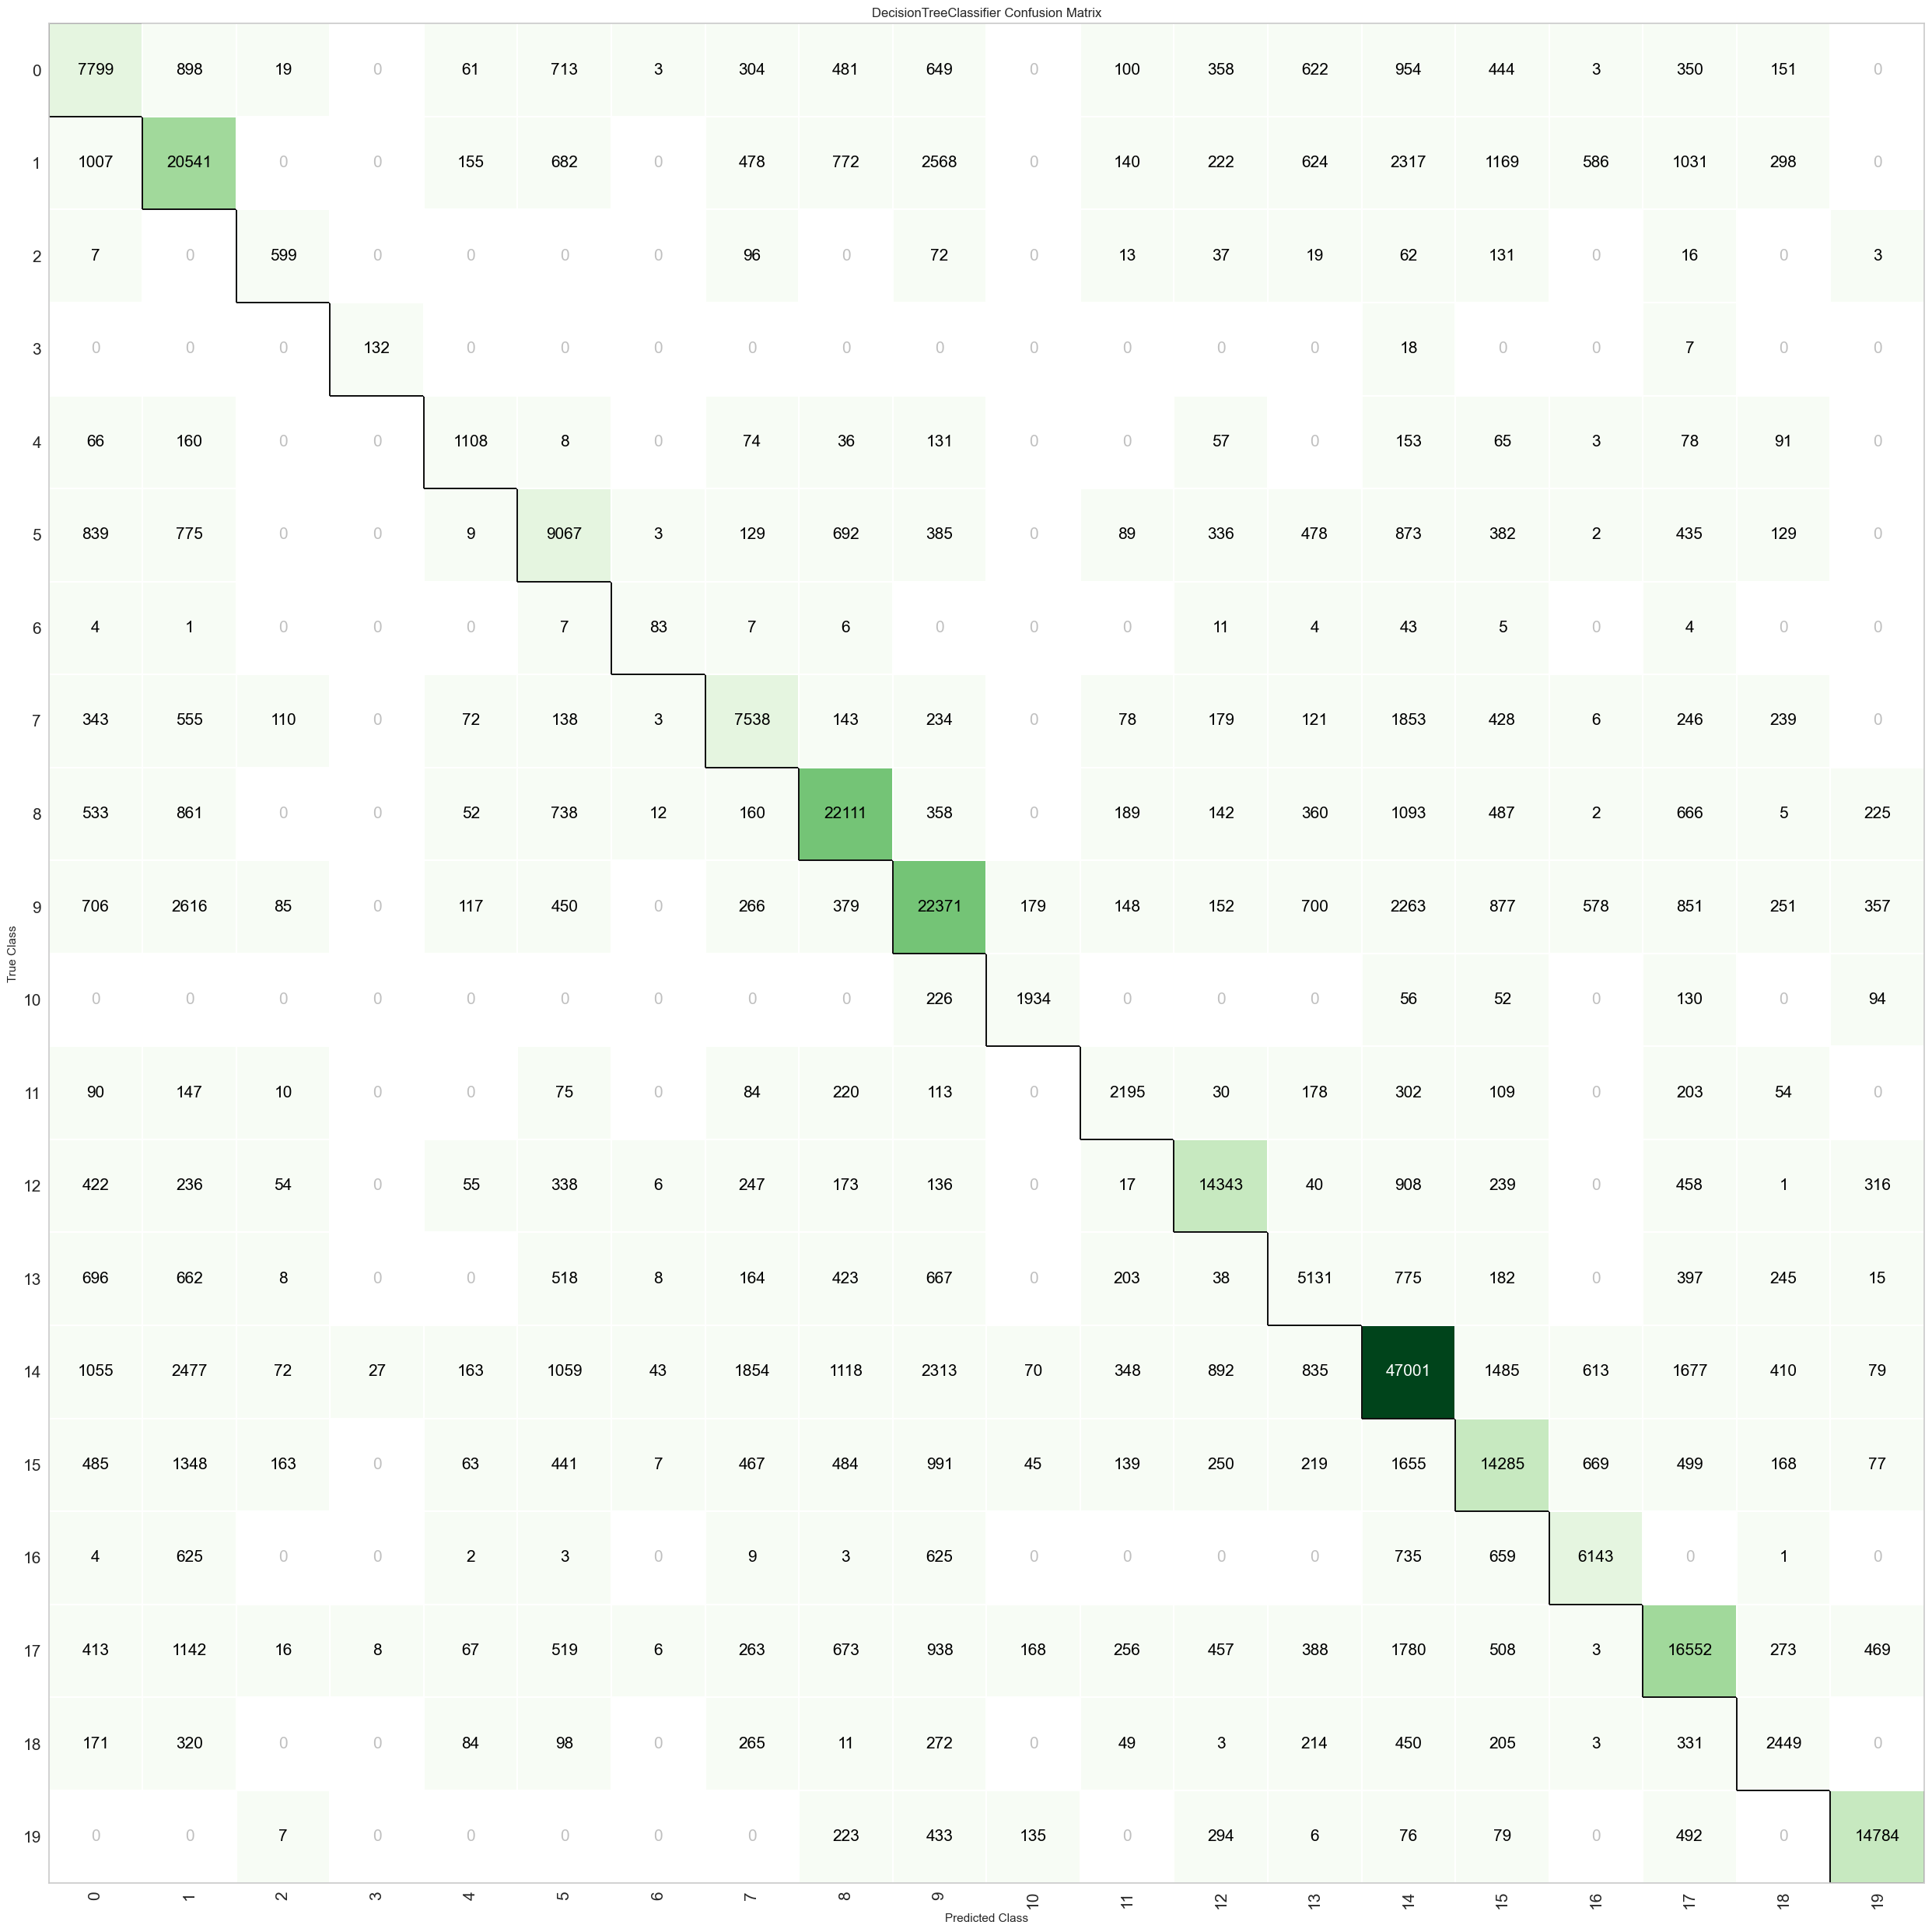

In [ ]:
# Confusion Matrix
plt.figure(figsize=(25, 25))
plot_model(decision_tree_model_tuned, plot = 'confusion_matrix') # save=True, use_train_data=False

### **Area Under the Curve (AUC)**

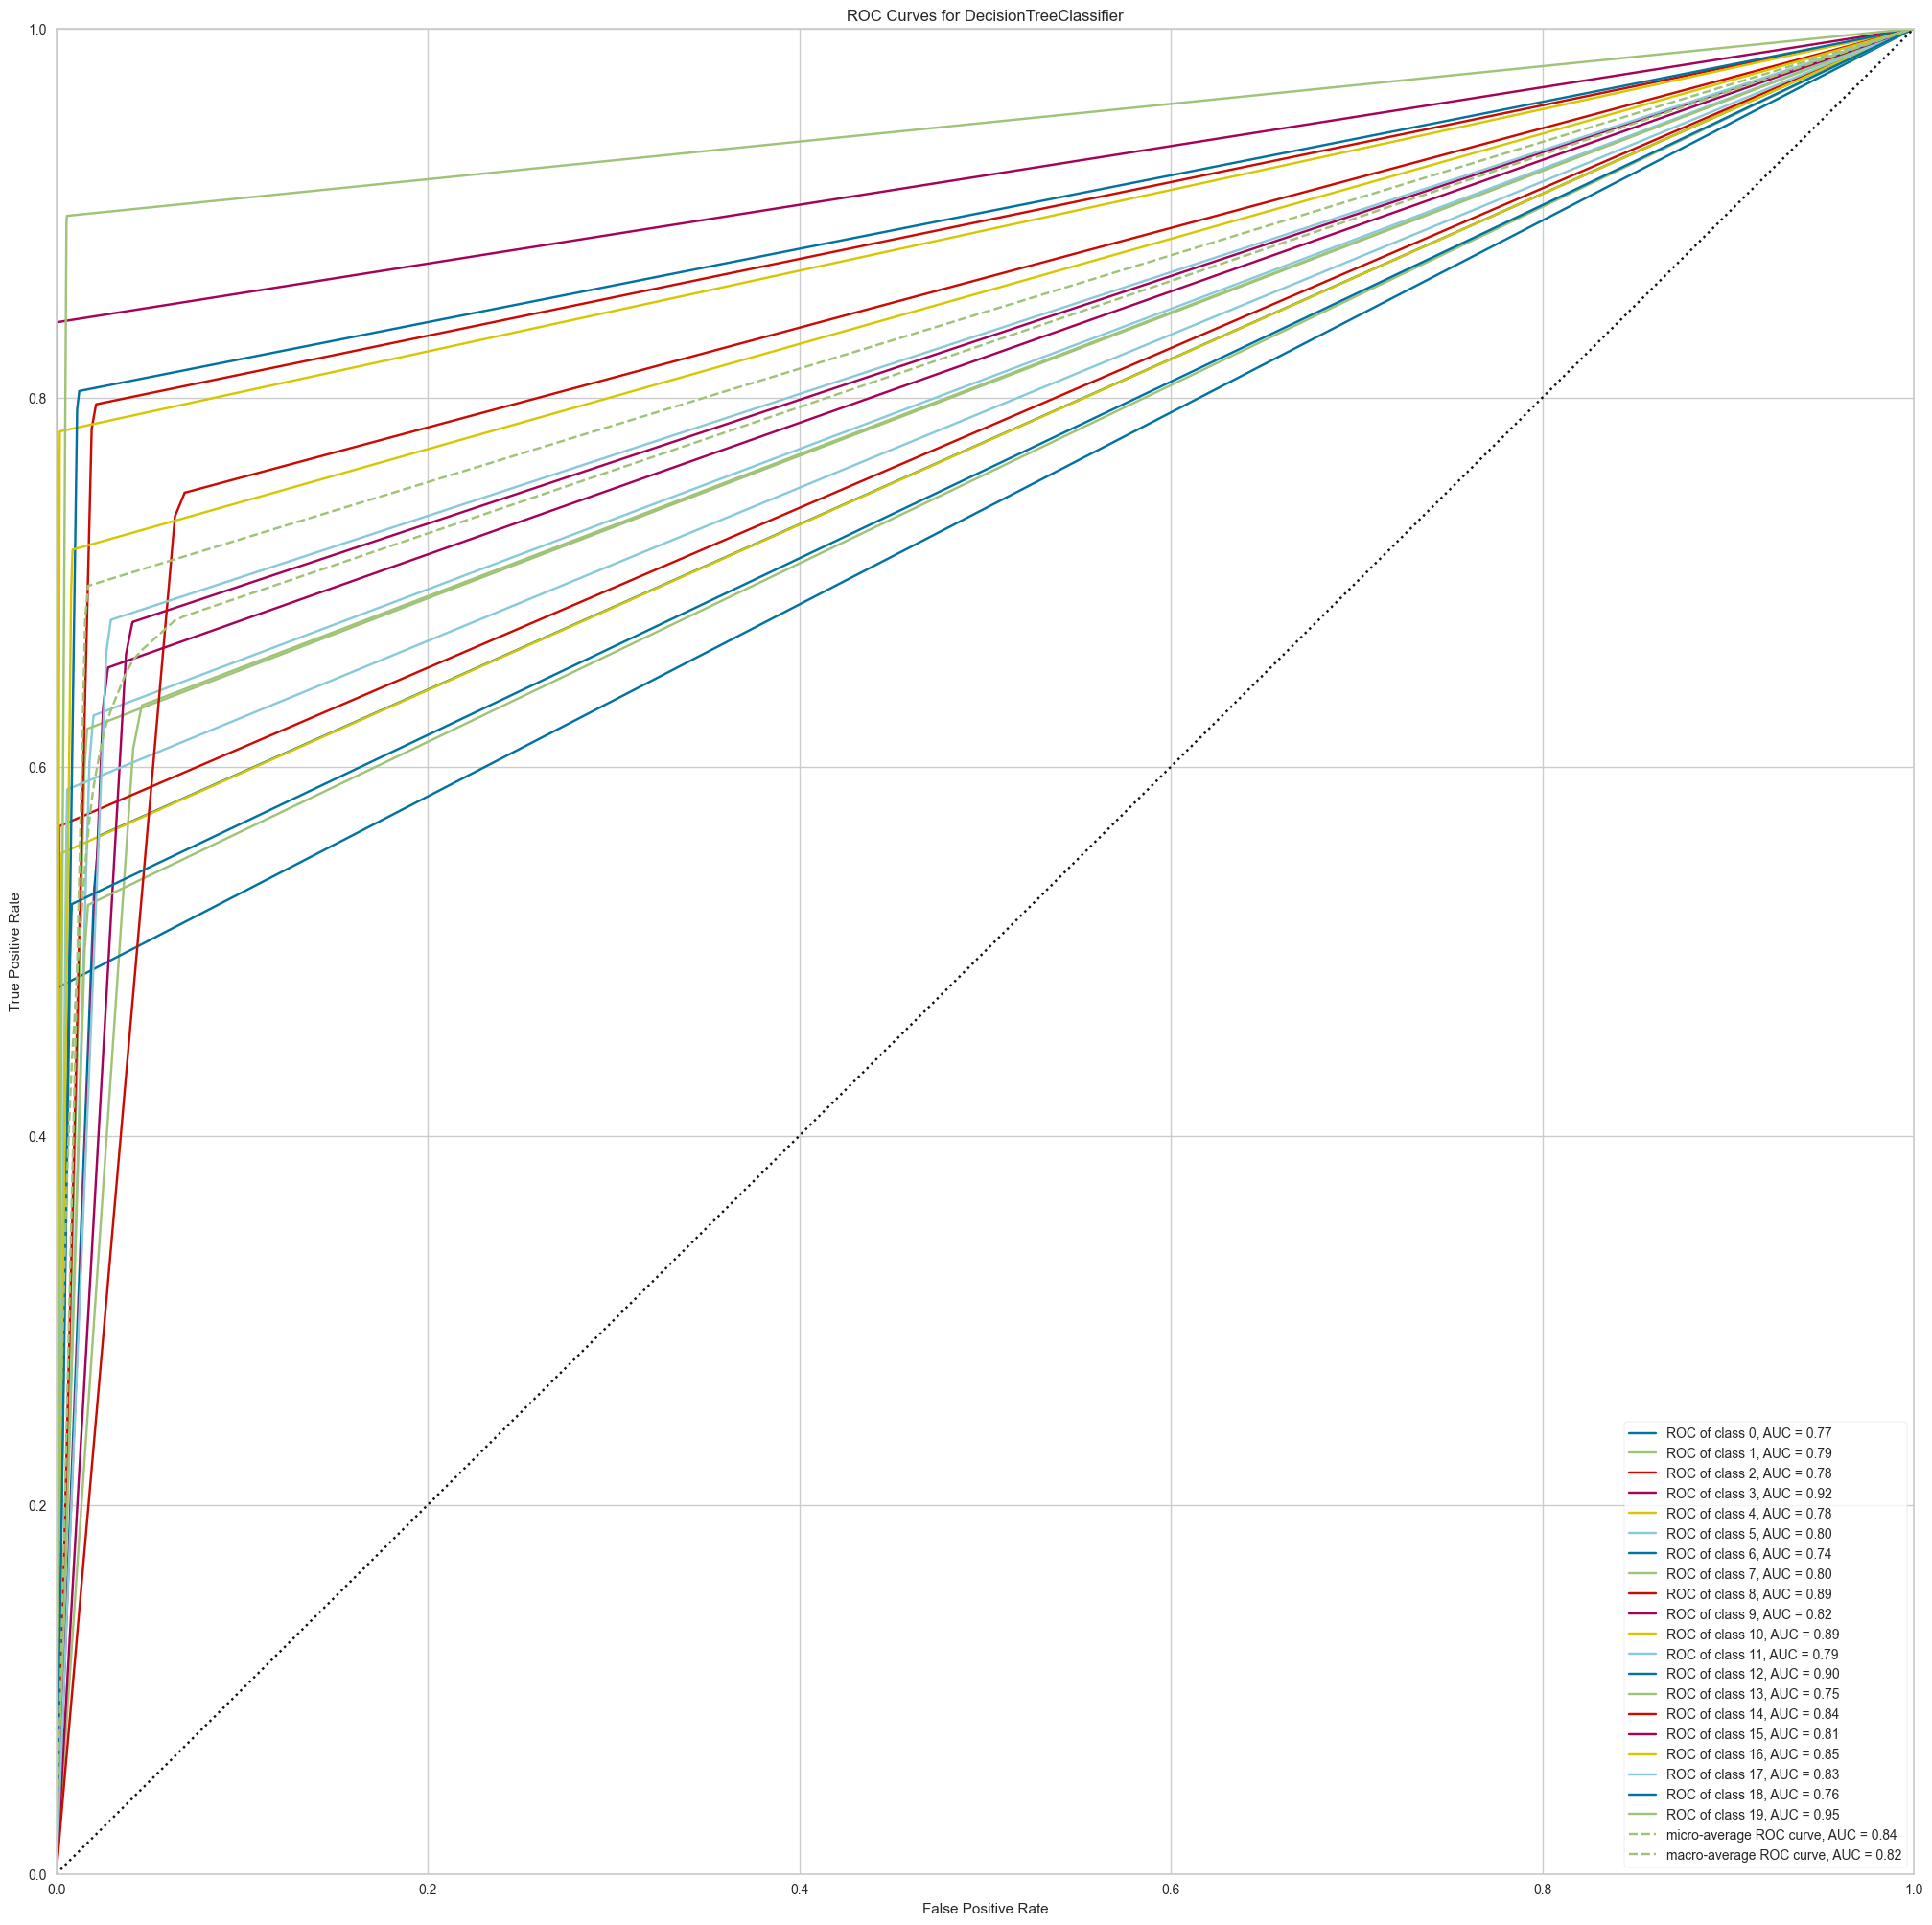

In [ ]:
# Area Under the Curve (AUC)
plt.figure(figsize=(25, 25))
plot_model(decision_tree_model_tuned, plot = 'auc') # save=True

### **Class Prediction Error**

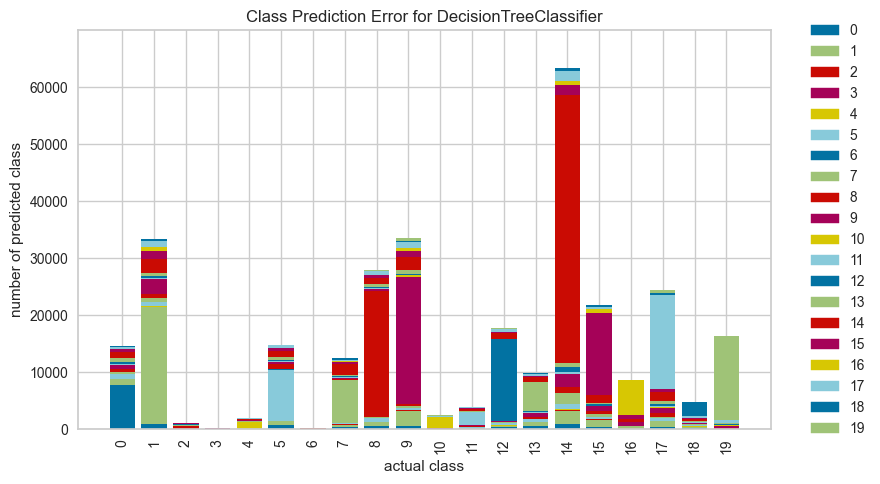

In [ ]:
# Class Prediction Error
plt.figure(figsize=(10, 5))
plot_model(decision_tree_model_tuned, plot = 'error') # save=True

### **Classification Report**

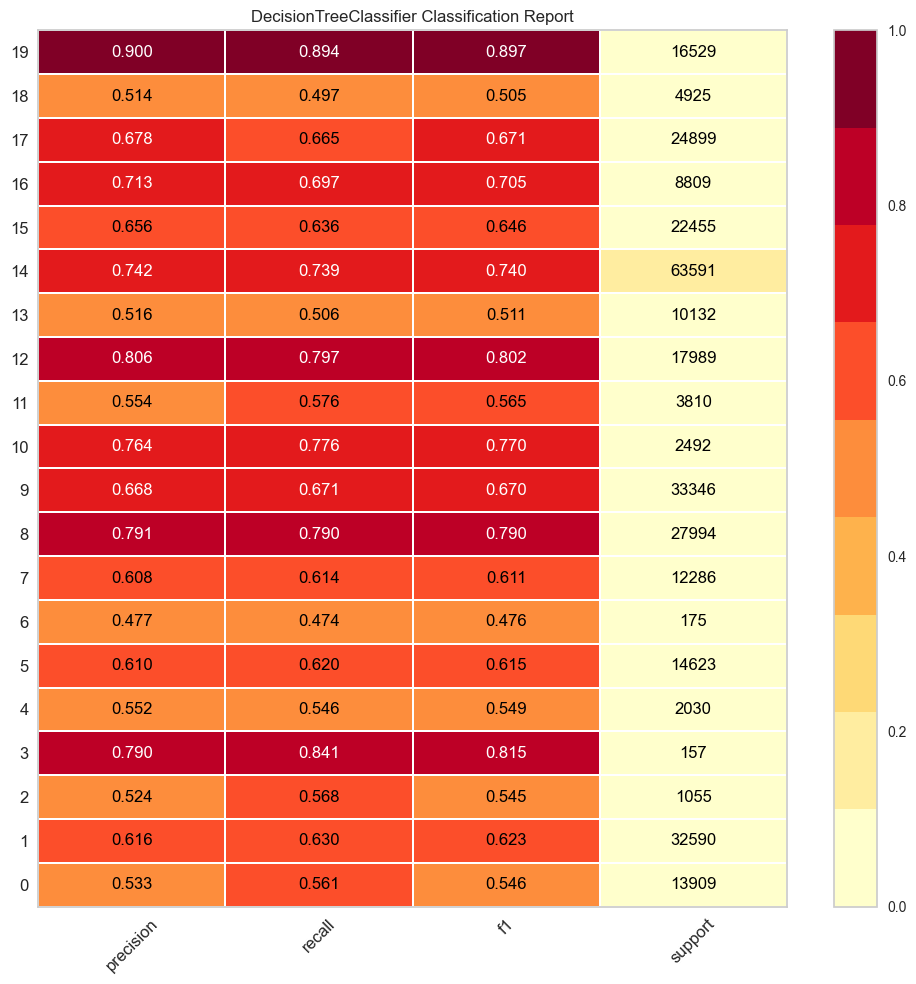

In [ ]:
# Classification Report
plt.figure(figsize=(10, 10))
plot_model(decision_tree_model_tuned, plot = 'class_report') # save=True

### **Feature Importance**

<Figure size 1000x1000 with 0 Axes>

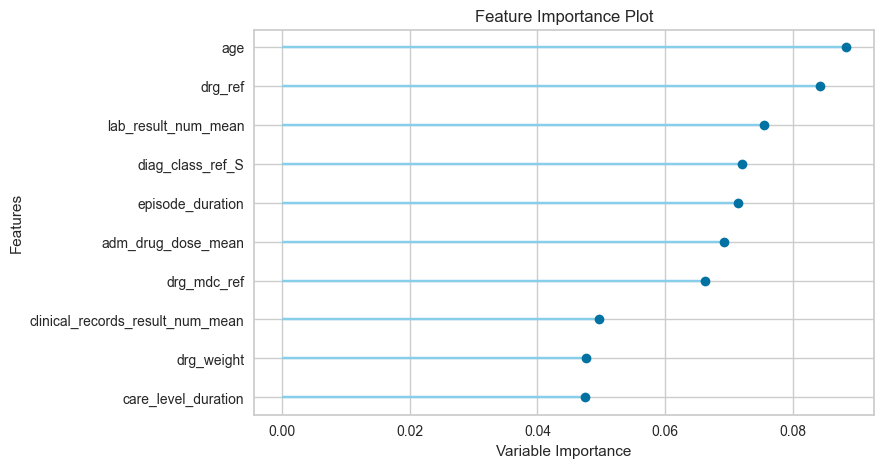

In [6]:
# Feature importance
plt.figure(figsize=(10, 10))
plot_model(decision_tree_model_tuned, plot = 'feature') # save=True